<a href="https://colab.research.google.com/github/nimasha20020207/Medical-data-visualizer/blob/main/Medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_excel('/content/dataset/medicaldataset.xlsx')
df = df['id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio'].str.split(',', expand=True)
df.columns = ['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [28]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Adding a new column to display overweigt people

In [22]:
#calculte the BMI
bmi = df['weight'].astype(float) / ((df['height'].astype(float) / 100)**2)

In [23]:
#adding the overweight column: 1 if BMI>25 else 0
df['overweight']=(bmi>25).astype(int)

In [25]:
#normalize cholestrol and glucose : 0=good , 1=bad
df['cholesterol']=(df['cholesterol'].astype(int)>1).astype(int)
df['gluc']=(df['gluc'].astype(int)>1).astype(int)

check the columns after the modifications

In [26]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


creating the categorical plot interactively

In [33]:
#melt data to long format
df_cat=pd.melt(
    df,
    id_vars=['cardio'],
    value_vars=['cholesterol','gluc','smoke','alco','active','overweight']
)

In [30]:
#calculte the BMI
bmi = df['weight'].astype(float) / ((df['height'].astype(float) / 100)**2)

#adding the overweight column: 1 if BMI>25 else 0
df['overweight']=(bmi>25).astype(int)

#melt data to long format
df_cat=pd.melt(
    df,
    id_vars=['cardio'],
    value_vars=['cholesterol','gluc','smoke','alco','active','overweight']
)

In [31]:
#count rows
df_cat=df_cat.groupby(['cardio','variable','value']).size().reset_index(name='total')

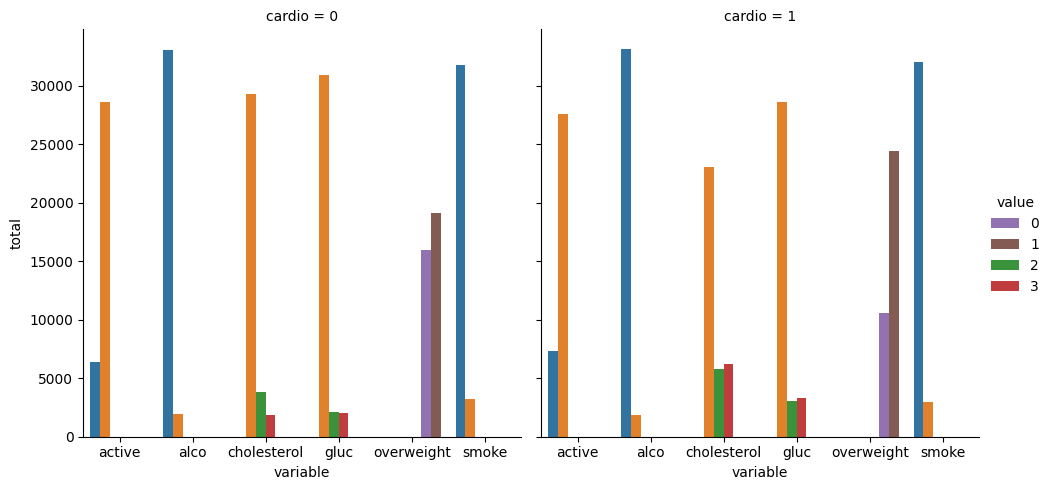

In [32]:
#draw categorical plot
sns.catplot(
    data=df_cat,
    x='variable',
    y='total',
    hue='value',
    col='cardio',
    kind='bar'
)

plt.show()

cleaning the data and preparing the heatmap

In [35]:
#filtering data
df_heat=df[
    (df['ap_lo'].astype(float)<=df['ap_hi'].astype(float))&
    (df['height'].astype(float)>=df['height'].astype(float).quantile(0.025))&
     (df['height'].astype(float)<=df['height'].astype(float).quantile(0.975))&
     (df['weight'].astype(float)>=df['weight'].astype(float).quantile(0.025))&
     (df['weight'].astype(float)<=df['weight'].astype(float).quantile(0.975))
]

In [36]:
#correlation matrix
corr=df_heat.corr(numeric_only=True)
corr

,overweight
overweight,1.0


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


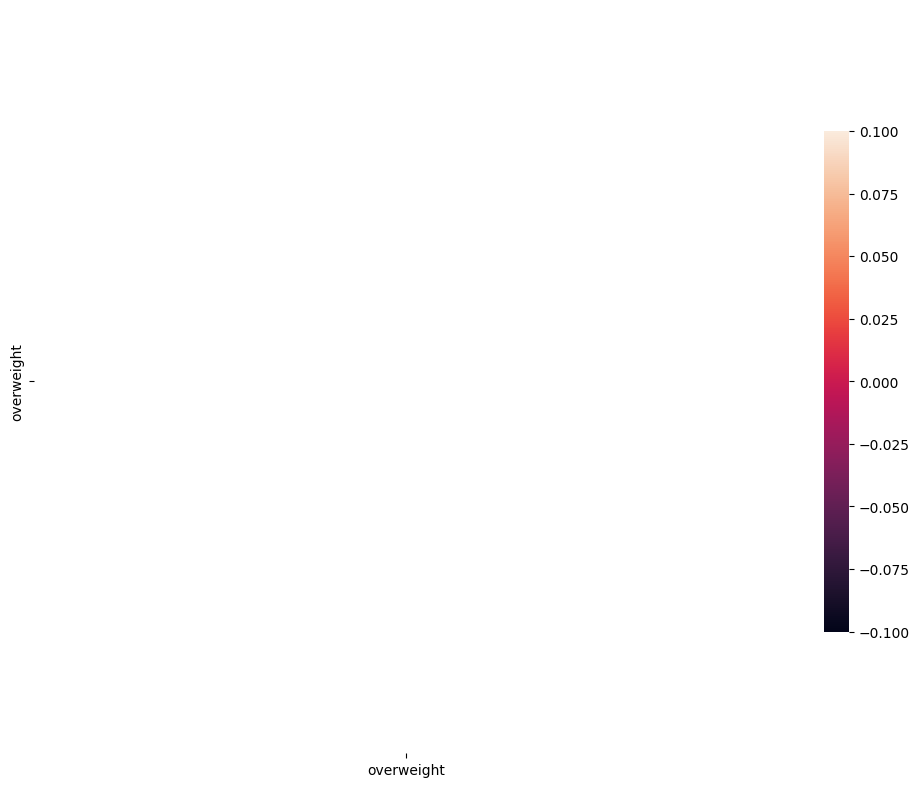

In [37]:
#drawing the heatmap
mask=np.triu(np.ones_like(corr,dtype=bool))

#plot heatmap
plt.figure(figsize=(12,13))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.1f',
    square='True',
    linewidths=0.5,
    cbar_kws={'shrink':0.5}
)
plt.show()